#                            Predictive Modelling
                               Linear Regression 
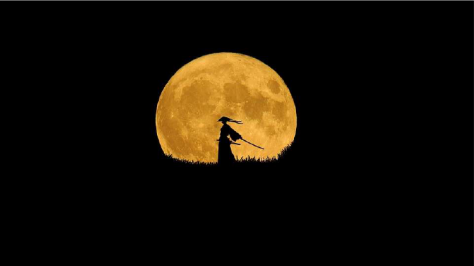

                            Anime Ratings Case Study 

# Problem Statement
Objective: 
A straming company is focusing on the anime available in their portal and wants to identify the most important factors involved in rating an
anime. As a data scientist, you are tasked with analyzing the portal's anime data and identifying the important factors by building a predictive
model to predict the rating of an anime. 


# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Loading the dataset

In [6]:
data = pd.read_csv("anime_ratings_data.csv") 

In [7]:
data.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


* The dataset contains information about different anime
+ Many anime seem to have a single episode only, which are movies
* Description seems to be missing for some anime 


In [8]:
data.shape

(6523, 15)

The dataset contains information (15 attributes) about 6523 anime 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


* There are 8 numeric (float and inttype) and 7 string (object type) columns in the data
* The target variable is the rating of an anime, which is of float type 

In [10]:
data.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,6496,8,TV,2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.0,NaN,NaN,NaN,8.716235,11.002479,1.0,1.0,1.0,12.0,34.0
duration,6248.0,NaN,NaN,NaN,18.396287,20.94935,1.0,5.0,7.0,25.0,67.0
startYr,6523.0,NaN,NaN,NaN,2005.241147,12.911035,1967.0,2000.0,2010.0,2015.0,2020.0
finishYr,6523.0,NaN,NaN,NaN,2005.575349,12.568169,1970.0,2000.0,2010.0,2015.0,2020.0
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.0,NaN,NaN,NaN,1347.948643,1737.138112,5.0,56.0,349.0,2252.5,4649.0
watching,6523.0,NaN,NaN,NaN,57.445654,76.527405,0.0,2.0,13.0,98.0,199.0


* We can see that the anime ratings vary between 1.1 and 4.7, which suggests that the anime were rated on a scale of 0-5
* The general rating of anime is 2.96
* TV is the most occurring type of media.
* The number of views for the anime in the data varies from 5 to ~5000
* The number of votes received by an anime in the data varies from 10 to 3100 

In [12]:
data.duplicated().sum() 

0

There are no duplicate values in the data 

In [14]:
data.isnull().sum() 


title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

There are missing values in many columns. 

In [15]:
# creating a copy of the data so that original data remains unchanged
df = data.copy() 


# Exploratory Data Analysis (EDA) 

## Data Preprocessing 

### Missing Value Treatment 

In [16]:
df.isnull().sum() 

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [17]:
# we first create a copy of the data to avoid changes to it
df1 = df.copy() 


In [19]:
df1['mediaType'].fillna("Other", inplace=True)
df1["duration"] = df1["duration"].fillna(value=df1.groupby(["genre", "mediaType"])["duration"].transform("median"))
df1["votes"] = df1["votes"].fillna(value=df1.groupby(["genre", "mediaType"])["votes"].transform("median"))


In [22]:
df1.isnull().sum() 

title                0
mediaType            0
eps                  0
duration             8
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

We willimpute the remaining missing values in the duration column with the median grouped by genre 

In [24]:
df1["duration"] = df1["duration"].fillna(value=df1.groupby(["genre"])["duration"].transform("median"))
df1.isnull().sum() 

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

### Feature Engineering
+ Let's create a new feature years_running by taking the difference between finishyr and startyr columns
+ We will drop the original columns once the new feature is created as the year values themselves are not numerical in nature 

In [26]:
df1["years_running"] = df1["finishYr"] - df1["startYr"]
df1.drop(["startYr", "finishYr"], axis=1, inplace=True)
df1.head()


,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


### Outlier Detection 

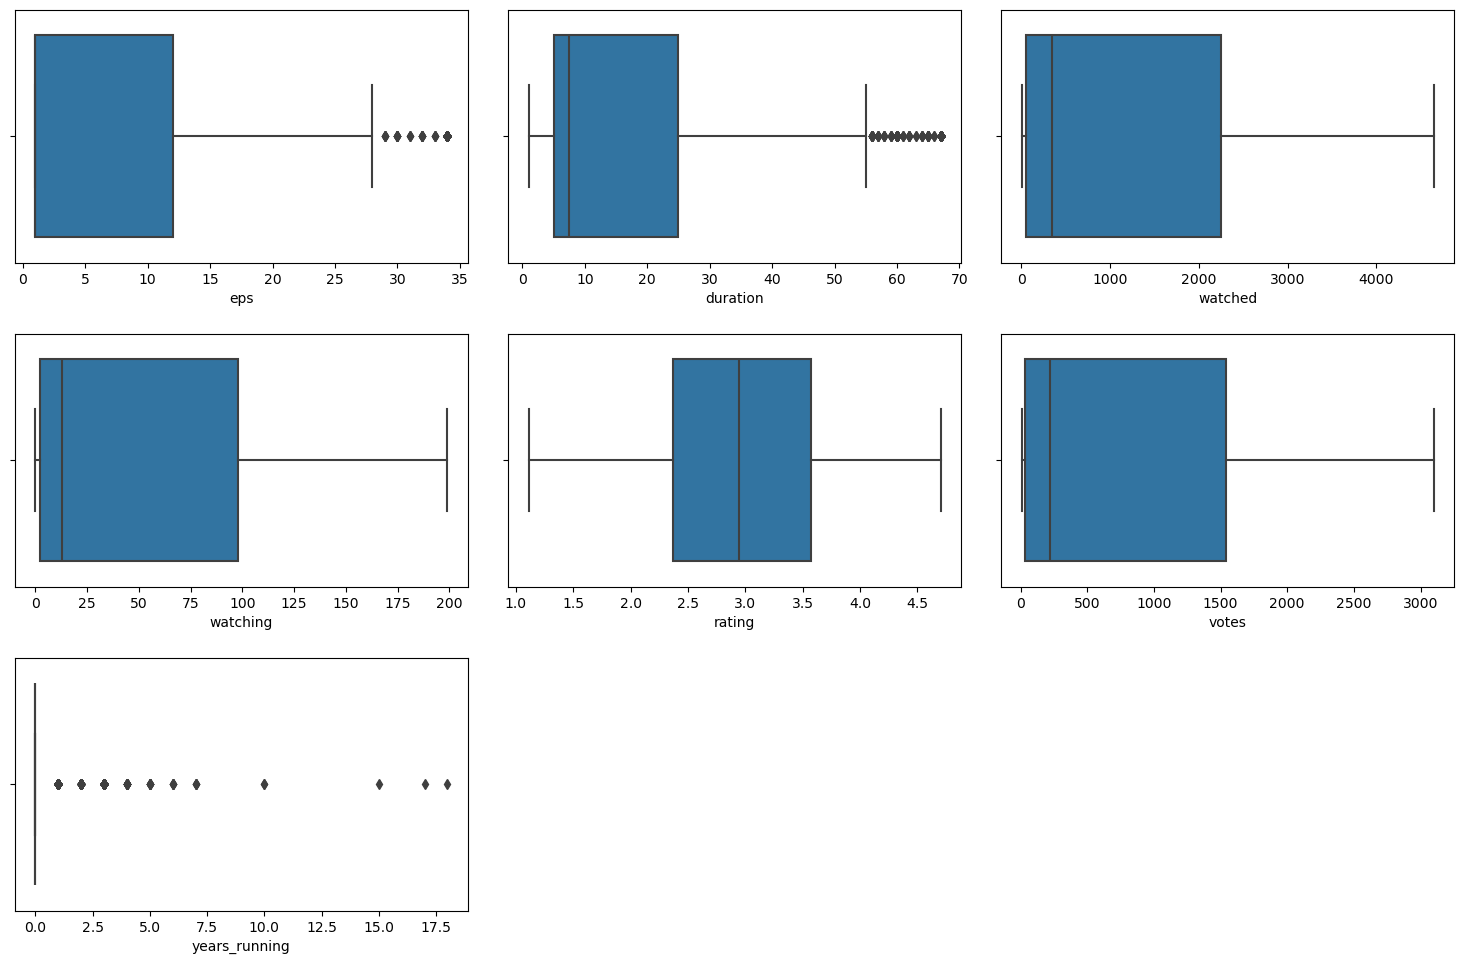

In [28]:
# outlier detection using boxplot num_cols = df1.select_dtypes(include=np.number).columns.tolist()
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
plt.tight_layout(pad=2)
plt.show()

+ There are quite a few outliers in the data
+ However, we will not treat them as they are proper values
+ We will drop the columns title and description as they contain a lot of text and too many unique values, and can be excluded from
modeling 

In [30]:
df1.drop(["title", "description"], axis=1, inplace=True)
df1.head() 


,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


### Data Preparation for Modeling 
+ We want to predict the rating of an anime
+ Before we proceed to build a model, we'll have to encode categorical features
+ We'll split the data into train and test to be able to evaluate the model that we build on the train data
+ We will build a Linear Regression model using the train data and then check it's performance 


In [34]:
df2 = df1.copy()

# Defining X and y variables
X = df2.drop(["rating"], axis=1)
y = df2["rating"]

# Adding the intercept to data
X = sm.add_constant(X)

# Creating dummy variables
columns = X.select_dtypes(include=["object", "category"]).columns.tolist()
X = pd.get_dummies(X, columns=columns, drop_first=True)

X.head() 


,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1.0,1,5.0,10,0,10.0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,46.0,1630,16,1103.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1,67.0,4649,184,3100.0,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.0,1,4.0,346,8,234.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [36]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head() 


,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1.0,67.0,4649.0,86.0,3100.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,5.0,10.0,0.0,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,46.0,1630.0,16.0,1103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,67.0,4649.0,184.0,3100.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,4.0,346.0,8.0,234.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1) 

print("Nunber of rows in train data =", x_train.shape[0])
print("Number of rows in test data =",x_test.shape[0])


Nunber of rows in train data = 4566
Number of rows in test data = 1957


# Model Building - Linear Regression 

In [38]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel. summary()) 


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     357.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:19:03   Log-Likelihood:                -2307.9
No. Observations:                4566   AIC:                             4684.
Df Residuals:                    4532   BIC:                             4902.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Interpreting the Regression Results 


1. Adjusted. R-squared: It reflects the fit of the model.
o Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain
conditions are met.
Case Study Predictive Modeling.ipynb - Colab
37.657 17.871 25.656 14.213 21.258 -7.460 -9.039 -9.168 -9.717 10.094 -7.885 15.800 -4.757 13.263 -8.735 -2.850 -3.635 -5.785 -5.603 1.430 -2.083 -3.747 -1.282 0.639 -3.580 0.072 -1.964 -0.065 -3.602 3.740 0.823 -0.791 0.040 -0.874
o Inour case, the value for adj. R-squared is 0.722, which is good.
2. const coefficient: It is the Y-intercept.
o Itmeans that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const
coefficient.
© Inour case, the value for const coefficient is 2.7707
3. Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
© Inour case, the coefficient of duration is 0.0123. 


### Model Performance Check 

Let's check the performance of the model using different metrics.
+ We will be using metric functions defined in sklearn for RMSE, MAE, and R?.
+ We will define a function to calculate MAPE and adjusted R2.
o The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the
average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no
extreme values in the data and none of the actual values are 0.
+ We will create a function which will print out all the above metrics in one go. 

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    
    df_perf = pd.DataFrame({
        "MAE": [mae],
        "RMSE": [rmse],
        "R-squared": [r2]
    })
    
    return df_perf


In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)  # to compute R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    
    # Creating a dataframe of metrics
    df_perf = pd.DataFrame({
        "MAE": [mae],
        "RMSE": [rmse],
        "R-squared": [r2]
    })
    
    return df_perf


In [43]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf 


Training Performance



,MAE,RMSE,R-squared
0,0.330417,0.40112,0.722387


In [44]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf 

Test Performance



,MAE,RMSE,R-squared
0,0.340426,0.413096,0.703053


### Observations
* The training R? is 0.72, so the model is not underfitting
* The train and test RMSE and MAE are comparable, so the model is not overfitting either
* MAE suggests that the model can predict anime ratings within a mean error of 0.34 on the test data 

## 2- Checking Linear Regression Assumptions
We will be checking the following Linear Regression assumptions:
1. No Multicollinearity
2. Linearity of variables 
3. Independence of error terms
4. Normality of error terms
5. No Heteroscedasticity 

### TEST FOR MULTICOLLINEARITY
* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor
variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret
the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.
* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.
* Variance Inflation Factor (VIF): Variance inflation factors measure the inflation in the variances of the regression parameter estimates
due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient 3,
is "inflated” by the existence of correlation among the predictor variables in the model.
* If VIFis 1, then there is no correlation among the kth predictor and the remaining predictor variables, and hence, the variance of 3,
is not inflated at all.
* General Rule of thumb:

    If VIF is between 1 and 5, then there is low multicollinearity.

    If VIF is between 5 and 10, we say there is moderate multicollinearity.

    If VIF is exceeding 10, it shows signs of high multicollinearity. 


In [46]:
# Let's define a function to check VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

# Assuming x_train is your predictors DataFrame
checking_vif(x_train).sort_values('VIF', ascending=False)


,feature,VIF
0,const,152.488126
5,votes,79.580182
3,watched,68.407244
31,genre_Other,11.591914
18,studio_primary_Others,11.131121
11,mediaType_TV,6.998184
4,watching,4.997799
26,genre_Adventure,4.197895
7,mediaType_Movie,4.062291
24,studio_primary_Toei Animation,3.983035


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept) 


### Removing Multicollinearity
To remove multicollinearity
1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again. 
5. Continue till you get all VIF scores under 5



In [47]:
# Let's define a function that will help us do this. 
def treating_multicollinearity(predictors, target, high_vif_columns):
    adj_r2 = []  # List to store adjusted R-squared values
    rmse = []  # List to store RMSE values
    
    for col in high_vif_columns:
        # Defining the new train set by dropping the column
        train = predictors.loc[:, ~predictors.columns.str.startswith(col)]
        
        # Create the OLS model
        olsmodel = sm.OLS(target, sm.add_constant(train)).fit()
        
        # Store adjusted R-squared and RMSE in the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))
    
    # Creating a dataframe for the results
    temp = pd.DataFrame({
        "col": high_vif_columns,
        "Adj. R-squared after dropping col": adj_r2,
        "RMSE after dropping col": rmse
    }).sort_values(by="Adj. R-squared after dropping col", ascending=False)
    
    temp.reset_index(drop=True, inplace=True)
    
    return temp

In [48]:
col_list = ["watched", "votes"]
res = treating_multicollinearity(x_train, y_train, col_list)
res


,col,Adj. R-squared after dropping col,RMSE after dropping col
0,votes,0.716994,0.405042
1,watched,0.707967,0.411451


In [49]:
col_to_drop = "votes"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
print(vif)


VIF after dropping votes
                             feature         VIF
0                              const  152.249342
1                                eps    3.873093
2                           duration    2.752030
3                            watched    3.235392
4                           watching    4.154724
5                      years_running    1.272523
6                    mediaType_Movie    4.060078
7              mediaType_Music Video    2.408173
8                      mediaType_OVA    3.049085
9                    mediaType_Other    1.729382
10                      mediaType_TV    6.924966
11              mediaType_TV Special    1.756017
12                     mediaType_Web    2.227588
13                   contentWarn_Yes    1.125939
14         studio_primary_J.C. Staff    2.512299
15           studio_primary_MADHOUSE    2.359013
16                studio_primary_OLM    1.882550
17             studio_primary_Others   11.126123
18     studio_primary_Production I.G    2.24

* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables 


In [52]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     362.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:28:19   Log-Likelihood:                -2335.7
No. Observations:                4566   AIC:                             4737.
Df Residuals:                    4533   BIC:                             4950.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Interpreting the Regression Results: 

4.std err: It reflects the level of accuracy of the coefficients.
* The lower it s, the higher is the level of accuracy.
5. P>It]: Itis p-value
* For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $ith
independent variable.
* $H_0$ : Independent feature is not significant ($\beta_i = 03)
* $H_a$ : Independent feature is that it s significant ($\beta_i \neq 0$)
* (P>It) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance
level.
= Ap-value of less than 0.05 is considered to be statistically significant.
6. Confidence Interval: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%). 

### Observations
* We can see that adj. R-squared has dropped from 0.720 to 0.717, which shows that the dropped columns did not have much effect on the
model
* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance 

### Dealing with high p-value variables
* Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'l drop them
* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
* Instead, we will do the following:
* Build a model, check the p-values of the variables, and drop the column with the highest p-value
* Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
* Repeat the above two steps till there are no columns with p-value > 0.05


> Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a lttle tedious and using a loop will be more efficient. 



In [53]:
import statsmodels.api as sm

# Initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# Setting an initial max p-value
max_p_value = 1
selected_features = []

while len(cols) > 0:
    # Defining the train set
    x_train_aux = predictors[cols]
    
    # Fitting the model
    model = sm.OLS(y_train, sm.add_constant(x_train_aux)).fit()
    
    # Getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    
    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    
    if max_p_value > 0.65:
        cols.remove(feature_with_p_max)
    else:
        break

# Output the selected features
selected_features = cols
print(selected_features)


['const', 'eps', 'duration', 'watched', 'watching', 'years_running', 'mediaType_Movie', 'mediaType_Music Video', 'mediaType_OVA', 'mediaType_Other', 'mediaType_TV', 'mediaType_TV Special', 'mediaType_Web', 'contentWarn_Yes', 'studio_primary_J.C. Staff', 'studio_primary_MADHOUSE', 'studio_primary_OLM', 'studio_primary_Others', 'studio_primary_Production I.G', 'studio_primary_Studio Deen', 'studio_primary_Studio Pierrot', 'studio_primary_Sunrise', 'studio_primary_TMS Entertainment', 'studio_primary_Toei Animation', 'genre_Adventure', 'genre_Comedy', 'genre_Drama', 'genre_Fantasy', 'genre_Other', 'genre_Sci Fi']


In [55]:
x_train3 = x_train2[selected_features]
x_test3=  x_test2[selected_features]
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2. summary()) 


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     400.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:33:59   Log-Likelihood:                -2335.8
No. Observations:                4566   AIC:                             4732.
Df Residuals:                    4536   BIC:                             4924.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [56]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n") 
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf 


Training Performance



,MAE,RMSE,R-squared
0,0.332746,0.403579,0.718974


In [58]:
# checking model performance on test set (seen 3% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf 


Test Performance



,MAE,RMSE,R-squared
0,0.341328,0.414519,0.701005


### Observations
* Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 s the final set of predictor variables and ofsmod2
as the final model to move forward with
* Now adjusted R-squared is 0.717, i, our model is able to explain ~72% of the variance
* The adjusted R-squared in olsmod (where we considered the variables without multicollinearity) was 0.717
* This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting 

### Now we'll check the rest of the assumptions on o/smod2.
2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No Heteroscedasticity 

### TEST FOR LINEARITY AND INDEPENDENCE 
Why the test?
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent
variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the
coefficient estimates will be narrower and make s incorrectly conclude a parameter to be statistically significant.

How to check linearity and independence?
* Make a plot of fitted values vs residuals.
* If they don't follow any pattern, then we say the model is linear and residuals are independent.
* Otherwise, the model is showing signs of non-linearity and residuals are not independent.

How to fix if this assumption is not followed?
* We can try to transform the variables and make the relationships linear. 

In [61]:
# Create a dataframe with actual, fitted, and residual values
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train  # Actual values
df_pred["Fitted Values"] = olsmod1.fittedvalues  # Predicted values (fit values)
df_pred["Residuals"] = olsmod1.resid  # Residuals

# Display the first few rows
df_pred.head()


,Actual Values,Fitted Values,Residuals
5432,2.872,2.791471,0.080529
5326,2.766,2.272987,0.493013
1021,4.049,4.439459,-0.390459
836,3.153,3.173346,-0.020346
1396,2.167,2.263109,-0.096109


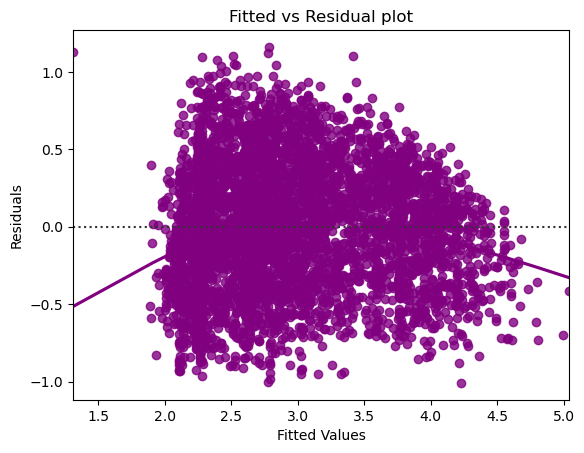

In [62]:
# Plotting the fitted values vs residuals
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values). 
* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't
capture non-linear effects.
* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied. 


### TEST FOR NORMALITY 

#### Why the test?
* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the
coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating
coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be
studied closely to make a better model

How to check normality?
* The shape of the histogram of residuals can give an initial idea about the normality.
+ It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise
not.
+ Other tests to check for normality includes the Shapiro-Wilk test.
* Null hypothesis: Residuals are normally distributed
* Alternate hypothesis: Residuals are not normally distributed

How to fix if this assumption is not followed?
* We can apply transformations like log, exponential, arcsinh, etc. as per our data. 

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


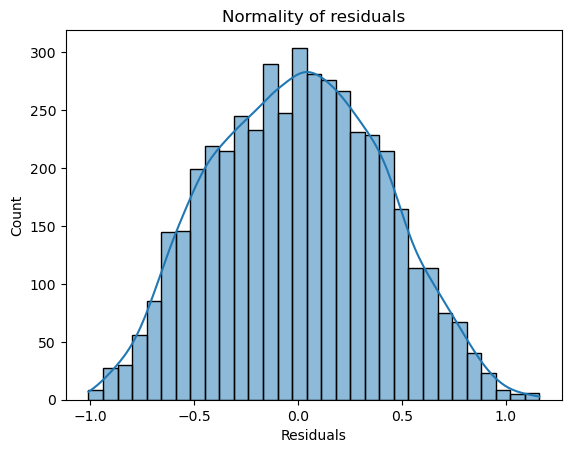

In [64]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show() 

+ The histogram of residuals does have a bell shape.
+ Let's check the Q-Q plot. 


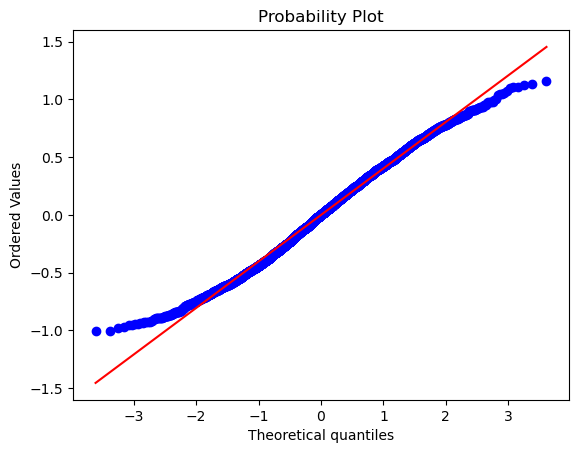

In [69]:
import pylab
import scipy.stats as stats
stats.probplot (df_pred["Residuals"], dist="norm", plot=pylab)
plt.show() 


+ The residuals more o less follow a straight line except for the tails.
+ Let's check the results of the Shapiro-Wilk test. 

In [70]:
stats. shapiro(df_pred[ "Residuals"]) 


ShapiroResult(statistic=0.9933727979660034, pvalue=1.0352021296384725e-13)

* Since pvalue < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
* So, the assumption is satisfied. 


### TEST FOR HOMOSCEDASTICITY 

+ Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be
homoscedastic.
* Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.
Why the test?
+ The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence
of outliers.
How to check for homoscedasticity?
+ The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form
an arrow shape or any other non-symmetrical shape.
+ The goldfeldquand test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are
heteroscedastic.
* Null hypothesis: Residuals are homoscedastic
* Alternate hypothesis: Residuals have heteroscedasticity
How to fix if this assumption is not followed?
*Heteroscedasticity can be fixed by adding other important features or making transformations. 

In [72]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)

# Output the test results
test_results = lzip(name, test)
print(test_results)


[('F statistic', 1.0410807772098365), ('p-value', 0.16970461993831826)]


Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied. 

### Predictions on test data 

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction. 

In [77]:
# predictions on the test set
pred = olsmod2.predict(x_test3) 

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred}) 
df_pred_test.sample(16, random_state=1) 


,Actual,Predicted
2023,2.039,2.260074
4543,3.236,3.783224
1914,2.314,2.320273
4856,2.457,2.171273
4405,2.322,2.328573
5755,4.344,3.931012
2341,2.858,2.276032
1637,3.976,3.883454
5730,3.728,3.587551
1385,2.692,2.421349


We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable 

### Final Model
Let's recreate the final model and print it's summary to gain insights. 

In [78]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy() 

olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())
 

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     400.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:47:34   Log-Likelihood:                -2335.8
No. Observations:                4566   AIC:                             4732.
Df Residuals:                    4536   BIC:                             4924.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   